I am just learning 

github: https://github.com/nicknochnack/DeepAudioClassification/blob/main/AudioClassification.ipynb

youtube: https://www.youtube.com/watch?v=ZLIPkmmDJAcI am just learning 

github: https://github.com/nicknochnack/DeepAudioClassification/blob/main/AudioClassification.ipynb

youtube: https://www.youtube.com/watch?v=ZLIPkmmDJAc

# 1. Import and Install Dependencies

## 1.1 Install Dependencies

In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install tensorflow_io

Defaulting to user installation because normal site-packages is not writeable


## Load Dependencies

In [4]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

2023-09-02 10:30:49.534606: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2. Build Data Loading Function

## 2.1 Define Paths to Files

In [5]:
CAPUCHIN_FILE = os.path.join('/Users/apple/Downloads/archive', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join('/Users/apple/Downloads/archive', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [6]:
CAPUCHIN_FILE

'/Users/apple/Downloads/archive/Parsed_Capuchinbird_Clips/XC3776-3.wav'

## 2.2 Build Dataloading Function

In [7]:
file_contents = tf.io.read_file(CAPUCHIN_FILE)

In [8]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1) 

#we get a tensor of shape say 132300,1

In [9]:
wav

<tf.Tensor: shape=(132300, 1), dtype=float32, numpy=
array([[-0.11117554],
       [-0.0378418 ],
       [ 0.05856323],
       ...,
       [-0.01077271],
       [-0.03436279],
       [-0.04879761]], dtype=float32)>

In [10]:
 wav = tf.squeeze(wav, axis=-1)

In [11]:
len(wav)

132300

In [12]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

In [13]:
wav = tfio.audio.resample(wav, rate_in=44100, rate_out=16000)

2023-09-02 10:31:06.878293: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX AVX2 FMA


In [14]:
len(wav)

48000

In [15]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)

    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # we are using a mono file 
    # stereo file has two audio channels 
    
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    #this shortend our data 
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

## 2.3 Plot Wave

In [16]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

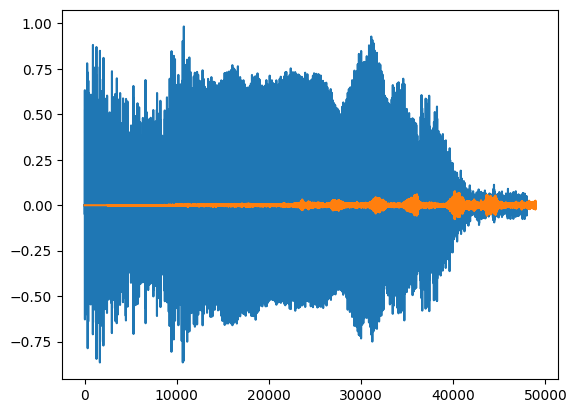

In [17]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# Create Tensorflow Dataset

now we will convert our data into a spectorgram 
so that we can later apply image classifciation techniques to it

## 3.1 Define Paths to Positive and Negative Data

In [18]:
POS = os.path.join('/Users/apple/Downloads/archive', 'Parsed_Capuchinbird_Clips')
NEG = os.path.join('/Users/apple/Downloads/archive', 'Parsed_Not_Capuchinbird_Clips')

In [19]:
POS

'/Users/apple/Downloads/archive/Parsed_Capuchinbird_Clips'

3.2 Create Tensorflow Datasets

In [20]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [21]:
pos.as_numpy_iterator().next()

b'/Users/apple/Downloads/archive/Parsed_Capuchinbird_Clips/XC216012-14.wav'

## 3.3 Add labels and Combine Positive and Negative Samples

In [22]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [23]:
data.as_numpy_iterator().next()

(b'/Users/apple/Downloads/archive/Parsed_Capuchinbird_Clips/XC216012-19.wav',
 1.0)

# 4. Determine Average Length of a Capuchin Call

## 4.1 Calculate Wave Cycle Length

In [24]:
lengths = []
for file in os.listdir(os.path.join('/Users/apple/Downloads/archive', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('/Users/apple/Downloads/archive', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [ ]:
lengths

[32000,
 40000,
 64000,
 48000,
 56000,
 56000,
 72000,
 80000,
 64000,
 64000,
 48000,
 56000,
 72000,
 48000,
 72000,
 40000,
 40000,
 40000,
 56000,
 64000,
 64000,
 56000,
 48000,
 56000,
 64000,
 32000,
 48000,
 56000,
 64000,
 48000,
 40000,
 39999,
 56000,
 64000,
 48000,
 56000,
 56000,
 56000,
 32000,
 48000,
 64000,
 64000,
 56000,
 40000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 48000,
 56000,
 48000,
 56000,
 56000,
 64000,
 48000,
 56000,
 48000,
 64000,
 56000,
 56000,
 48000,
 56000,
 64000,
 64000,
 56000,
 48000,
 56000,
 48000,
 56000,
 64000,
 56000,
 64000,
 64000,
 56000,
 56000,
 56000,
 40000,
 48000,
 56000,
 48000,
 64000,
 64000,
 48000,
 48000,
 56000,
 48000,
 64000,
 64000,
 56000,
 56000,
 40000,
 56000,
 64000,
 56000,
 64000,
 40000,
 56000,
 56000,
 56000,
 56000,
 56000,
 48000,
 56000,
 48000,
 64000,
 56000,
 56000,
 40000,
 48000,
 48000,
 56000,
 64000,
 48000,
 48000,
 56000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 48000,


## 4.2 Calculate Mean, Min and Max

In [ ]:
# we have 16000 cycles per second and the mean is 54156
# on average the bird call will be 
54156/16000

3.38475

In [ ]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [ ]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [ ]:
# the shortest call will be
32000/16000

2.0

In [ ]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [ ]:
# the longest call will be
80000/16000

5.0

# 5. Build Preprocessing Function to Convert to Spectrogram

## 5.1 Build Preprocessing Function

In [ ]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

## 5.2 Test Out the Function and Viz the Spectrogram

In [ ]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [ ]:
spectrogram, label = preprocess(filepath, label)

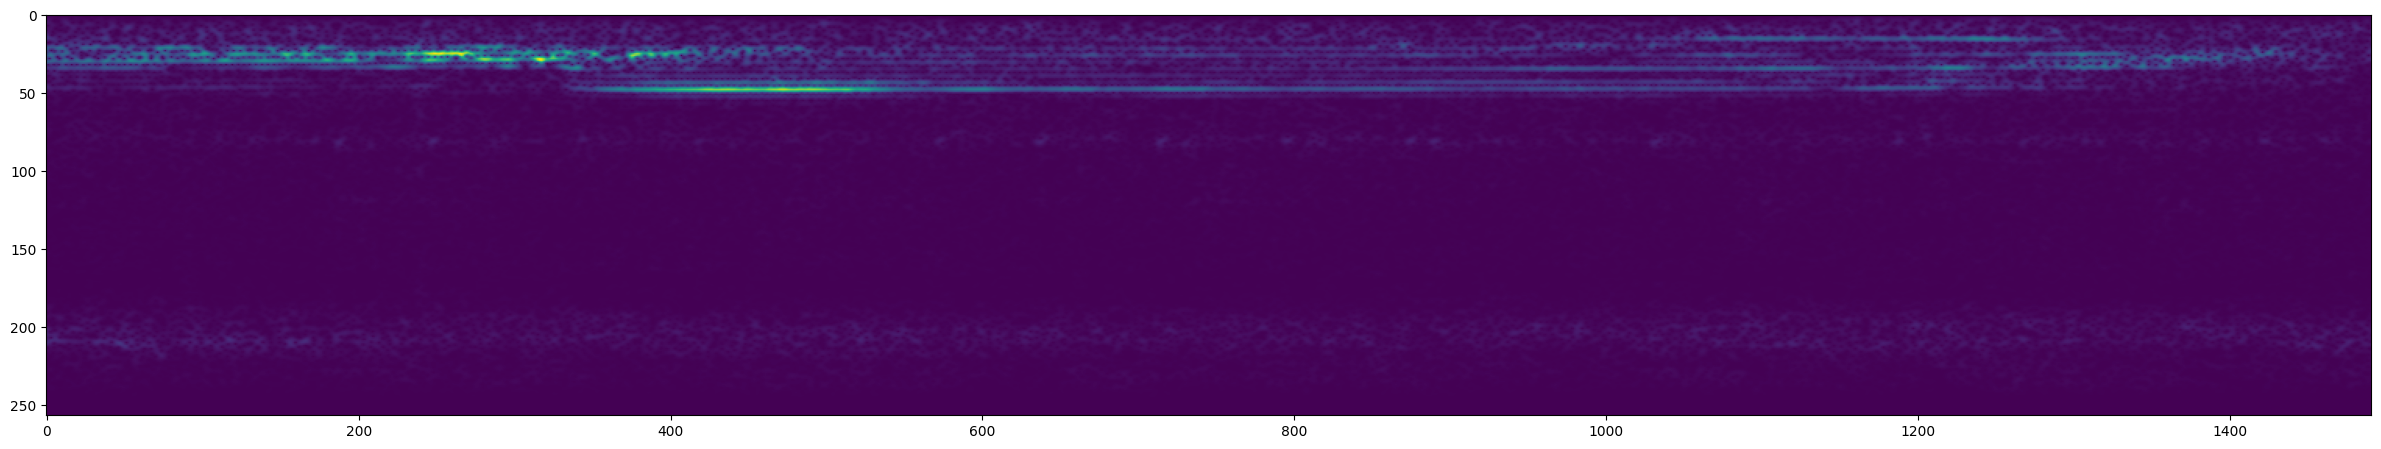

In [ ]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# 6. Create Training and Testing Partitions

## 6.1 Create a Tensorflow Data Pipeline

In [ ]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

## 6.2 Split into Training and Testing Partitions

In [ ]:
len(data)*.7

35.699999999999996

In [ ]:
train = data.take(36)
test = data.skip(36).take(15)

## 6.3 Test One Batch

In [ ]:
samples, labels = train.as_numpy_iterator().next()

2023-08-27 22:22:06.379157: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 233 of 1000
2023-08-27 22:22:16.443555: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 423 of 1000
2023-08-27 22:22:26.401653: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 606 of 1000
2023-08-27 22:22:36.305655: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


In [ ]:
samples.shape

(16, 1491, 257, 1)

# 7. Build Deep Learning Model

## 7.1 Load Tensorflow Dependencies

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

## 7.2 Build Sequential Model, Compile and View Summary

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

model.summary()

## 7.3 Fit Model, View Loss and KPI Plots

In [ ]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
13/36 [=========>....................] - ETA: 35:46:32 - loss: 3.8291 - recall: 0.9149 - precision: 0.7679

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

In [ ]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

In [ ]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

# 8. Make a Prediction on a Single Clip

## 8.1 Get One Batch and Make a Prediction

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

In [ ]:
yhat = model.predict(X_test)

## 8.2 Convert Logits to Classes

In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

# 9. Build Forest Parsing Functions

## 9.1 Load up MP3s

In [ ]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
mp3 = os.path.join('data', 'Forest Recordings', 'recording_00.mp3')

In [ ]:
wav = load_mp3_16k_mono(mp3)

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [ ]:
samples, index = audio_slices.as_numpy_iterator().next()

## 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [ ]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

## 9.3 Convert Longer Clips into Windows and Make Predictions

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [ ]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

## 9.4 Group Consecutive Detections

In [ ]:
from itertools import groupby

In [ ]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [ ]:
calls

# 10. Make Predictions

## 10.1 Loop over all recordings and make predictions

In [ ]:
results = {}
for file in os.listdir(os.path.join('data', 'Forest Recordings')):
    FILEPATH = os.path.join('data','Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

In [ ]:
results

## 10.2 Convert Predictions into Classes

In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

## 10.3 Group Consecutive Detections

In [ ]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

# 11. Export Results

In [ ]:
import csv

In [ ]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])